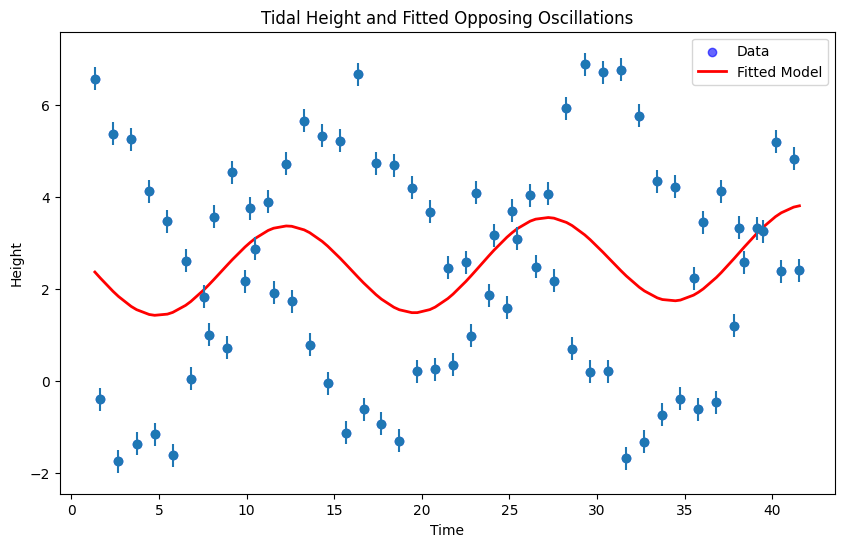

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Load the data from the file
data = np.genfromtxt("ASTR19_F24_group_project_data.txt", dtype=[('myint', 'i8'), ('mystring', 'U6'), ('myfloat', 'f8')])

# Setting empty lists to fill up with column data
day = []
time = []
height = []

#pass in a string time to convert to a decimal value of a day
def convertTimeToNum(t):
  hours, minutes, = map(int, t) #use map to convert strings to ints
  return (hours + minutes/60)/24

# Looping over every row and extracting the relevant data
for i in range(82):
    day.append(data[i][0])
    t = convertTimeToNum(data[i][1].split(":")) #grab time
    combine = float(data[i][0] + t)
    time.append(round(combine,3))
    height.append(data[i][2])

# Convert the lists to numpy arrays for easier manipulation
time = np.array(time)
height = np.array(height)

# Define the oscillatory model function with two distinct opposing oscillations
def tidal_model(t, amp1, amp2, freq1, freq2, phase1, phase2,vert1, vert2):

    # Two oscillations with opposite phases
    return (amp1 * np.cos(freq1 * (t) + phase1) + vert1) + (amp2 * np.cos(freq2 * (t) + phase2) + vert2)

# initial guess for amp1, amp2, freq1, freq2, phase1, phase2, vert1, vert2
p0 = [6.57, -0.39, 2 * np.pi / 12, 2 * np.pi / 24, 0, np.pi, 2.,2.]

#define sigma for curve_fit
sigma = np.full(len(height), 0.25)

# Fit the model to the data using curve_fit
params, params_cov = curve_fit(tidal_model, day, height, p0=p0, sigma = sigma)

# Generate the fitted curve using the fitted parameters
fitted_heights = tidal_model(time, *params)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(time, height, color='b', label="Data", alpha=0.6)
plt.plot(time, fitted_heights, 'r-', label="Fitted Model", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Height")
plt.title("Tidal Height and Fitted Opposing Oscillations")
plt.legend()

#Error of 0.25
y_err = np.full(len(height), 0.25)
plt.errorbar(time, height,yerr=y_err,fmt='o')

#savefig
plt.show()
plt.savefig('Height_and_Fitted_Curve.pdf')

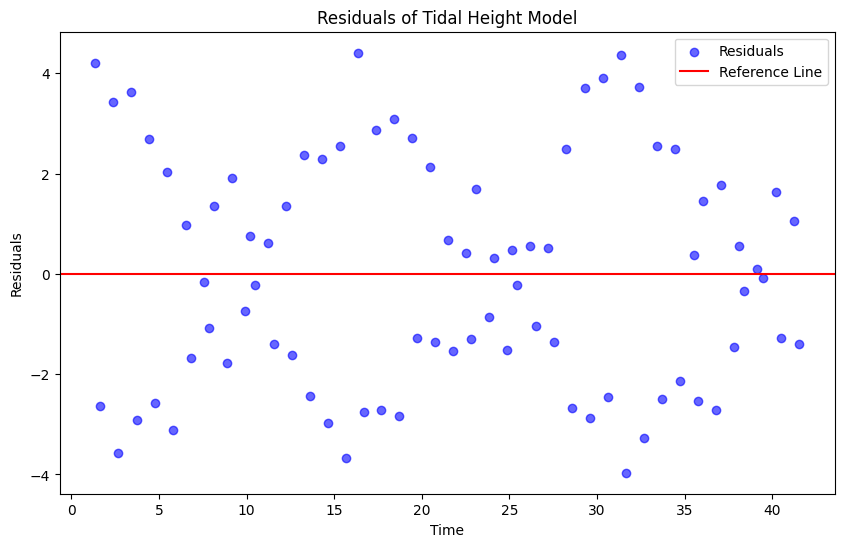

In [4]:
#plot residual graph

residuals = height - fitted_heights

plt.figure(figsize=(10, 6))
plt.scatter(time, residuals, color='b', label="Residuals",alpha=0.6)
plt.axhline(0, color='r', label="Reference Line")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.title("Residuals of Tidal Height Model")
plt.legend()

plt.show()

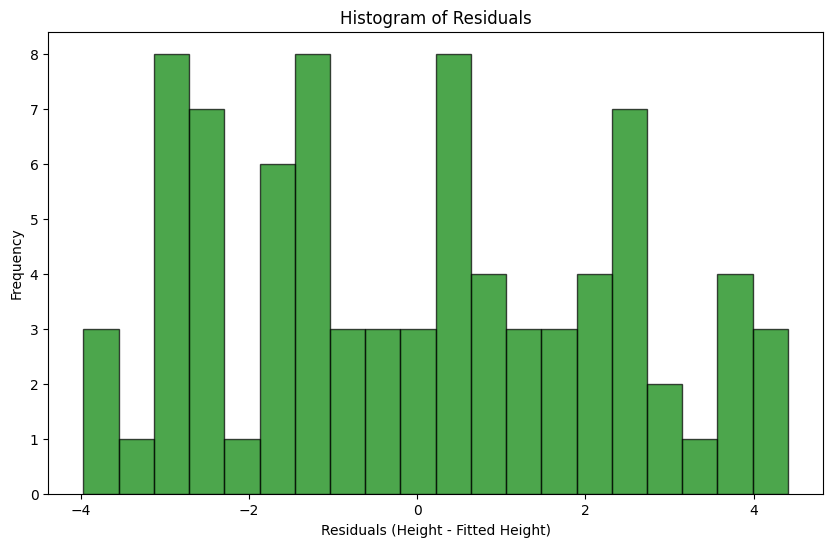

In [14]:
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
n_bins = 20 

# create histogram 
plt.hist(residuals, bins=n_bins, color='g', alpha=0.7, edgecolor='black')

# Labeling the plot
plt.xlabel("Residuals (Height - Fitted Height)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")

# Save the histogram as a PDF
plt.savefig("residuals_histogram.pdf")


In [9]:
# Standard deviation of residuals
residual_std = np.std(residuals)
print(f"Standard Deviation of Residuals: {residual_std}")

Standard Deviation of Residuals: 2.274637080847559


In [11]:
#intrinsic scatter = sqrt(variance)
intrinsic_scatter = np.sqrt(residual_std**2 - 0.25**2)
print(f"Estimated Intrinsic Scatter: {intrinsic_scatter}")

Estimated Intrinsic Scatter: 2.2608568839196135
